<a href="https://colab.research.google.com/github/yeijSong/dataAnalysis/blob/main/unit09_%EC%9A%B0%EB%A6%AC_%EB%8F%99%EB%84%A4_%EC%9D%B8%EA%B5%AC_%EA%B5%AC%EC%A1%B0%EB%A5%BC_%ED%8C%8C%EC%9D%B4_%EC%B0%A8%ED%8A%B8%EB%A1%9C_%EB%82%98%ED%83%80%EB%82%B4%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

한글 깨짐 방지

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


제주특별자치도의 성별 분포를 항아리 모양 그래프로 표현

지역명을 입력하세요 : 제주특별자치도


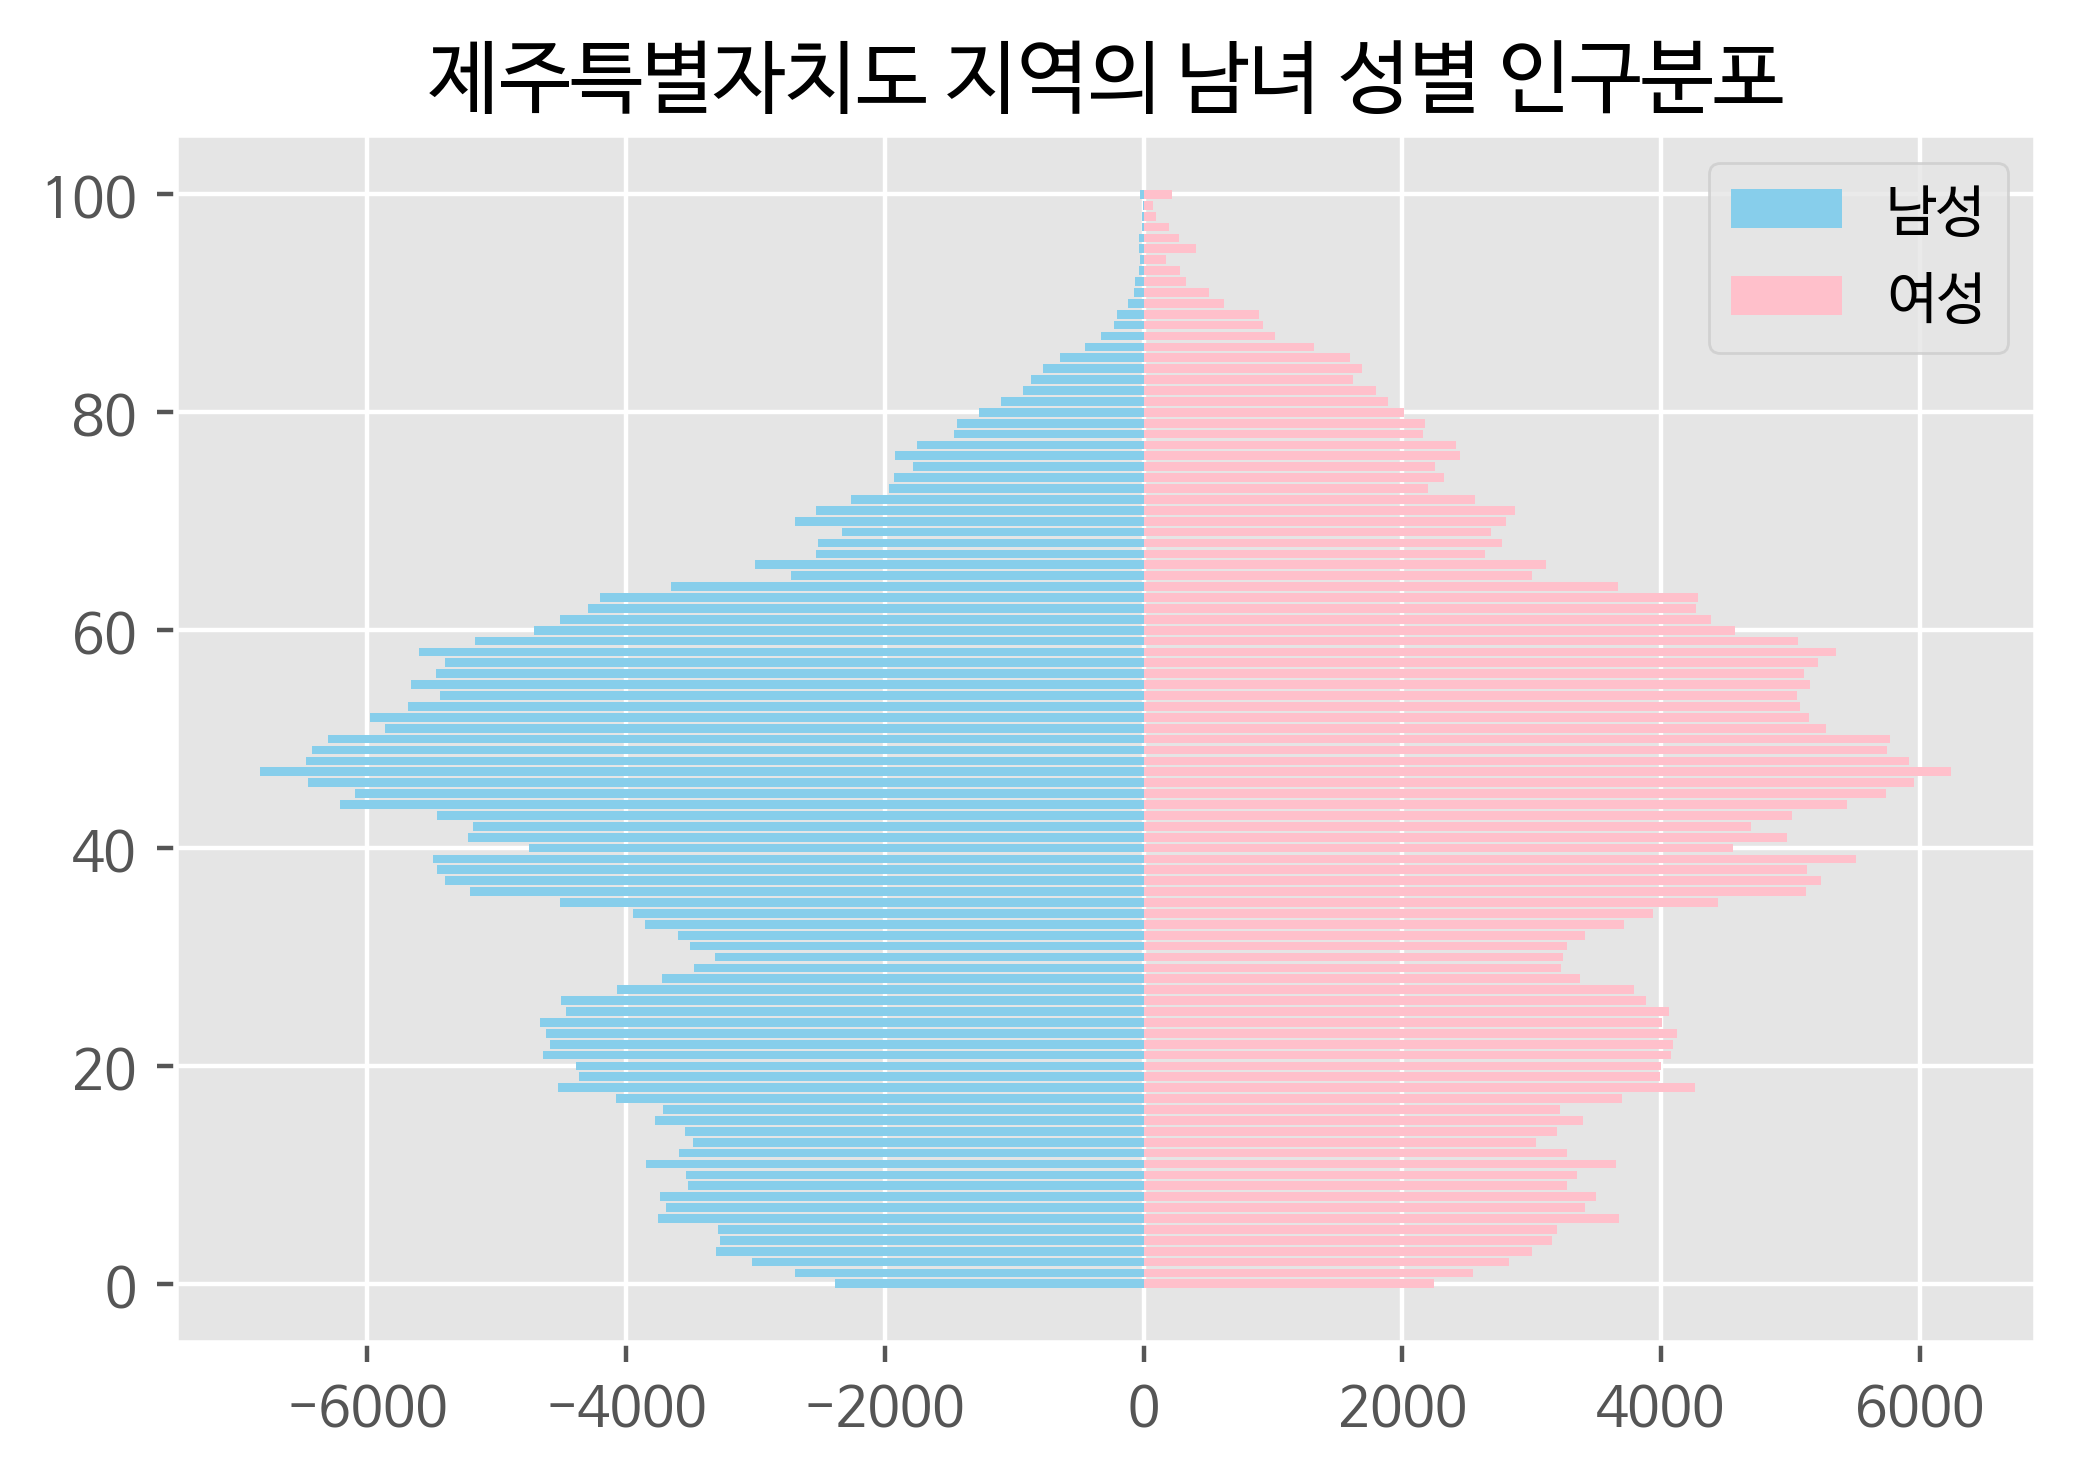

In [ ]:
import csv
import matplotlib.pyplot as plt


f=open('gender.csv',encoding='cp949')
data=csv.reader(f)

m=[]
f=[]

name=input('지역명을 입력하세요 : ')
for row in data:
  if name in row[0]:
    for i in row[3:104]: # 남성데이터(3~103번 데이터 슬라이싱)
      m.append(-int(i.replace(',','')))
    for i in row[106:]: # 여성데이터(106~끝까지 데이터 슬라이싱)
      f.append(int(i.replace(',','')))
    break


plt.style.use('ggplot')
plt.figure(dpi=200)
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus']=False
plt.barh(range(101),m,color='skyblue',label='남성')
plt.barh(range(101),f,color='pink',label='여성')
plt.legend()
plt.title(name+' 지역의 남녀 성별 인구분포')
plt.show()

항아리 모양의 그래프는 연령대별 인구 차이 확인 가능

but 어떤 성별이 더 많은 지에 대한 정보를 한눈에 파악하기 어려움 

so 파이차트 Pie 활용해야함

**파이차트(pie())**

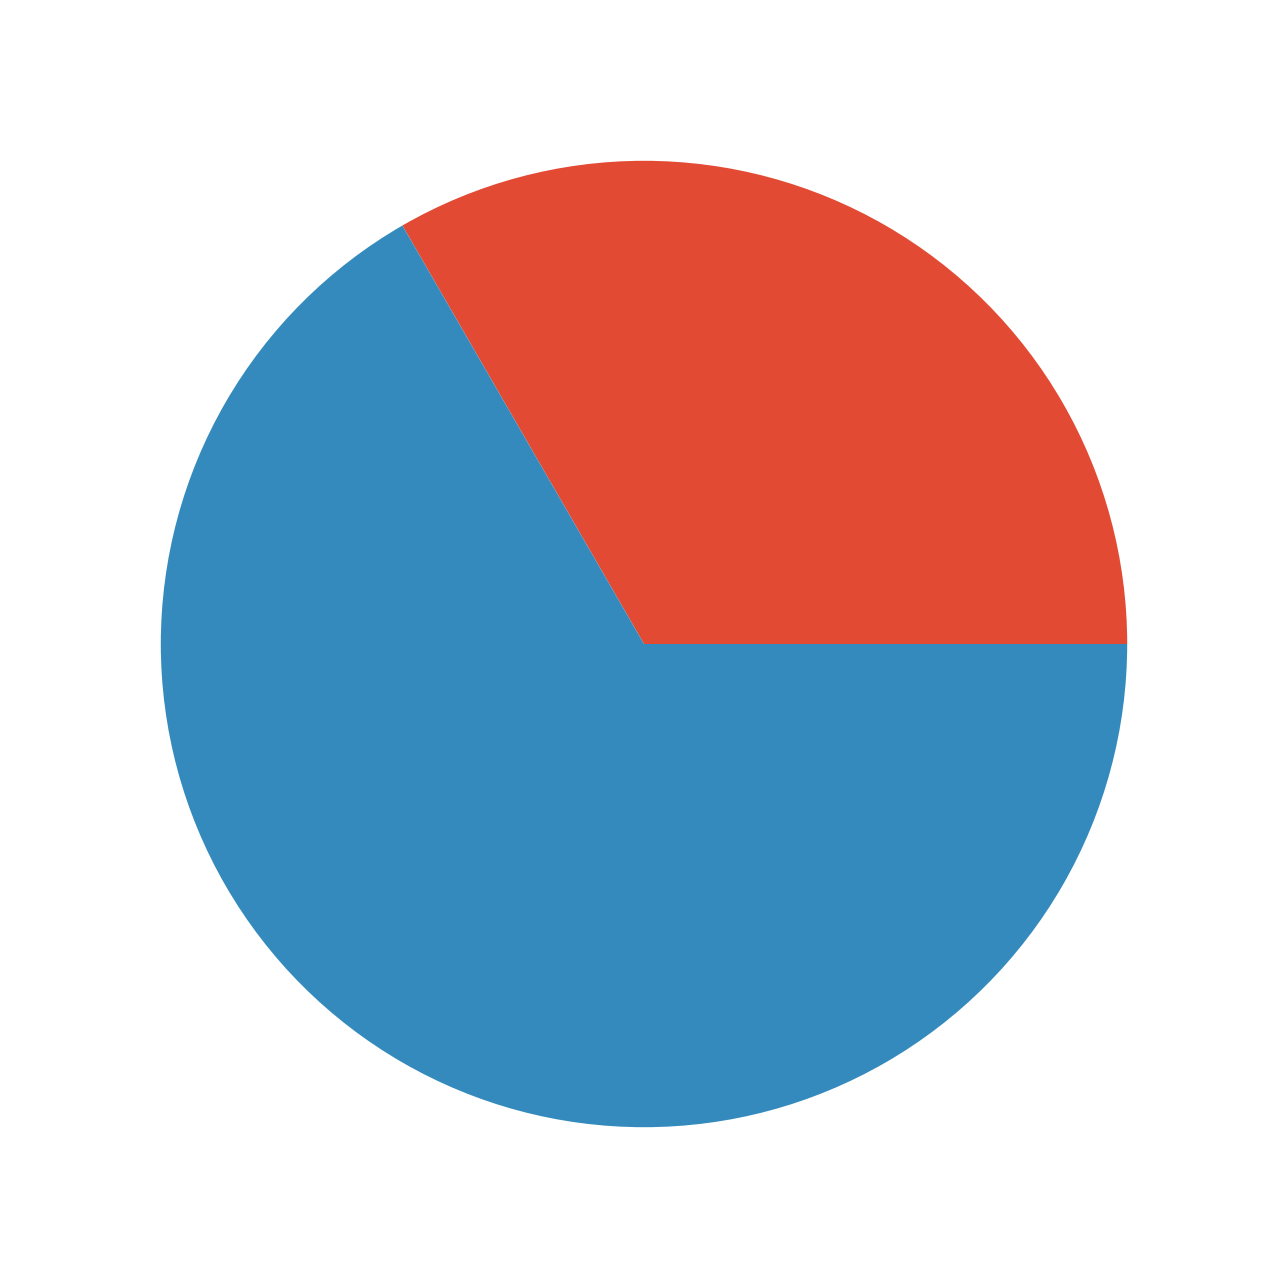

In [ ]:
import matplotlib.pyplot as plt

plt.figure(dpi=200)

plt.pie([10,20]) # pie(x) x가 가지고 있는 값을 비율로 표시
plt.show()

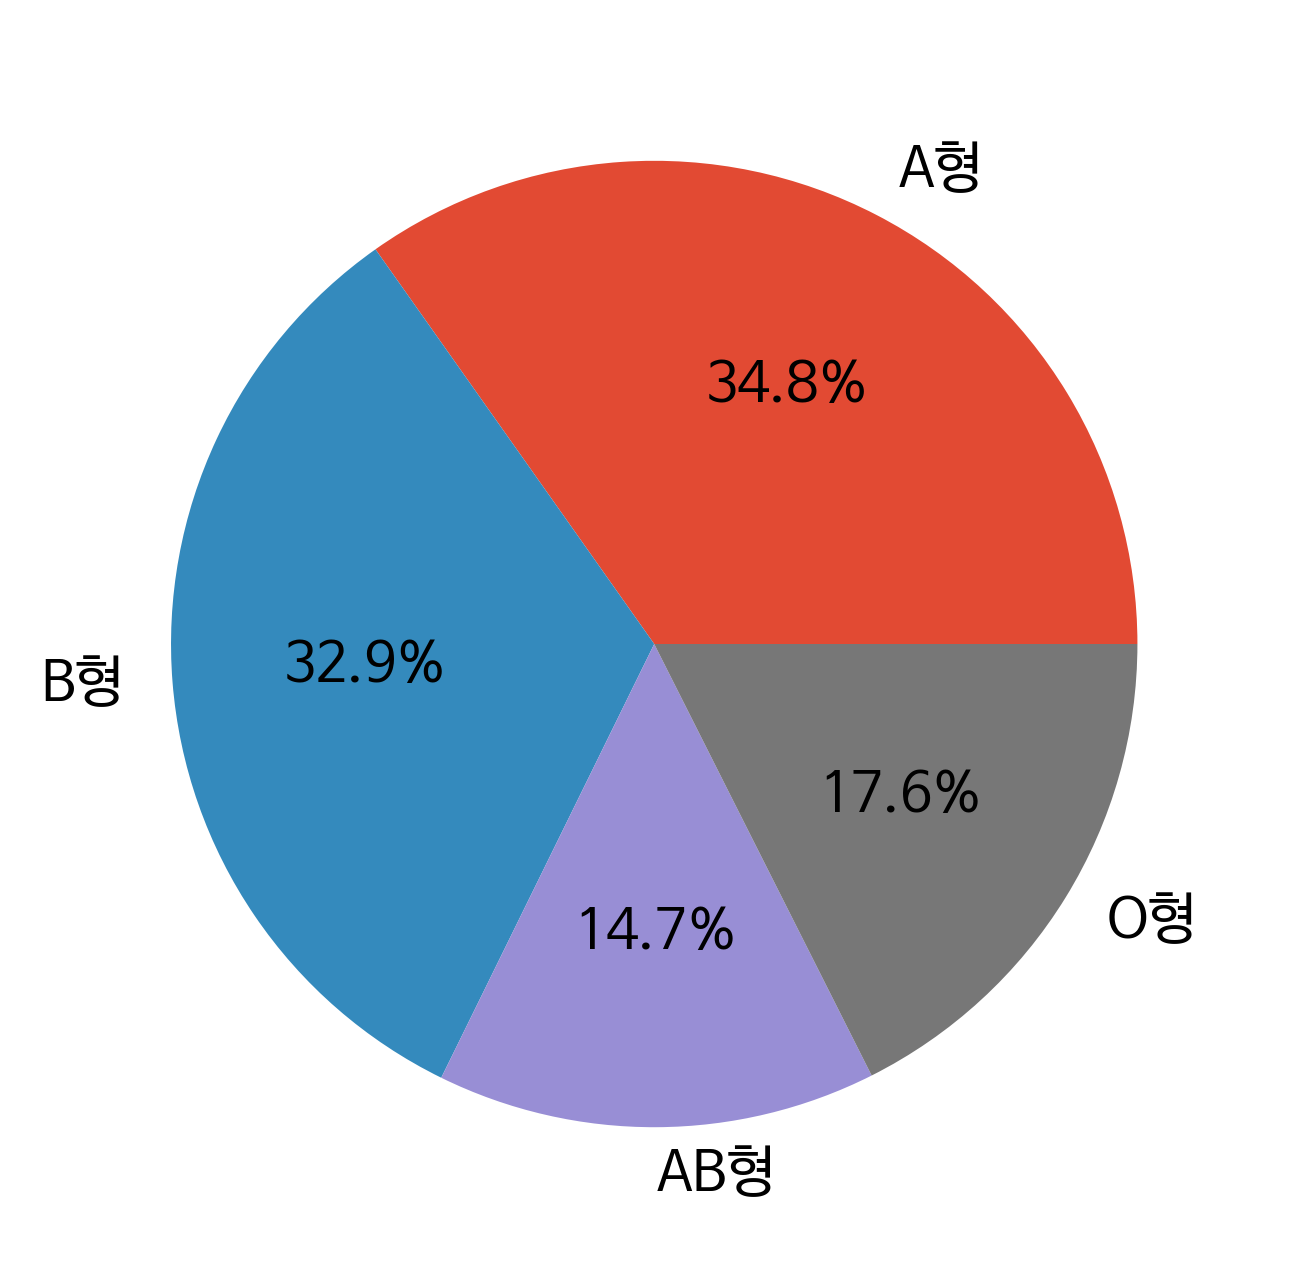

In [ ]:
import matplotlib.pyplot as plt

plt.figure(dpi=200)

size = [2441,2312,1031,1233]
label = ['A형','B형','AB형','O형']
plt.pie(size, labels=label, autopct='%.1f%%') # 혈액형의 비율을 임의로 작성

plt.show()

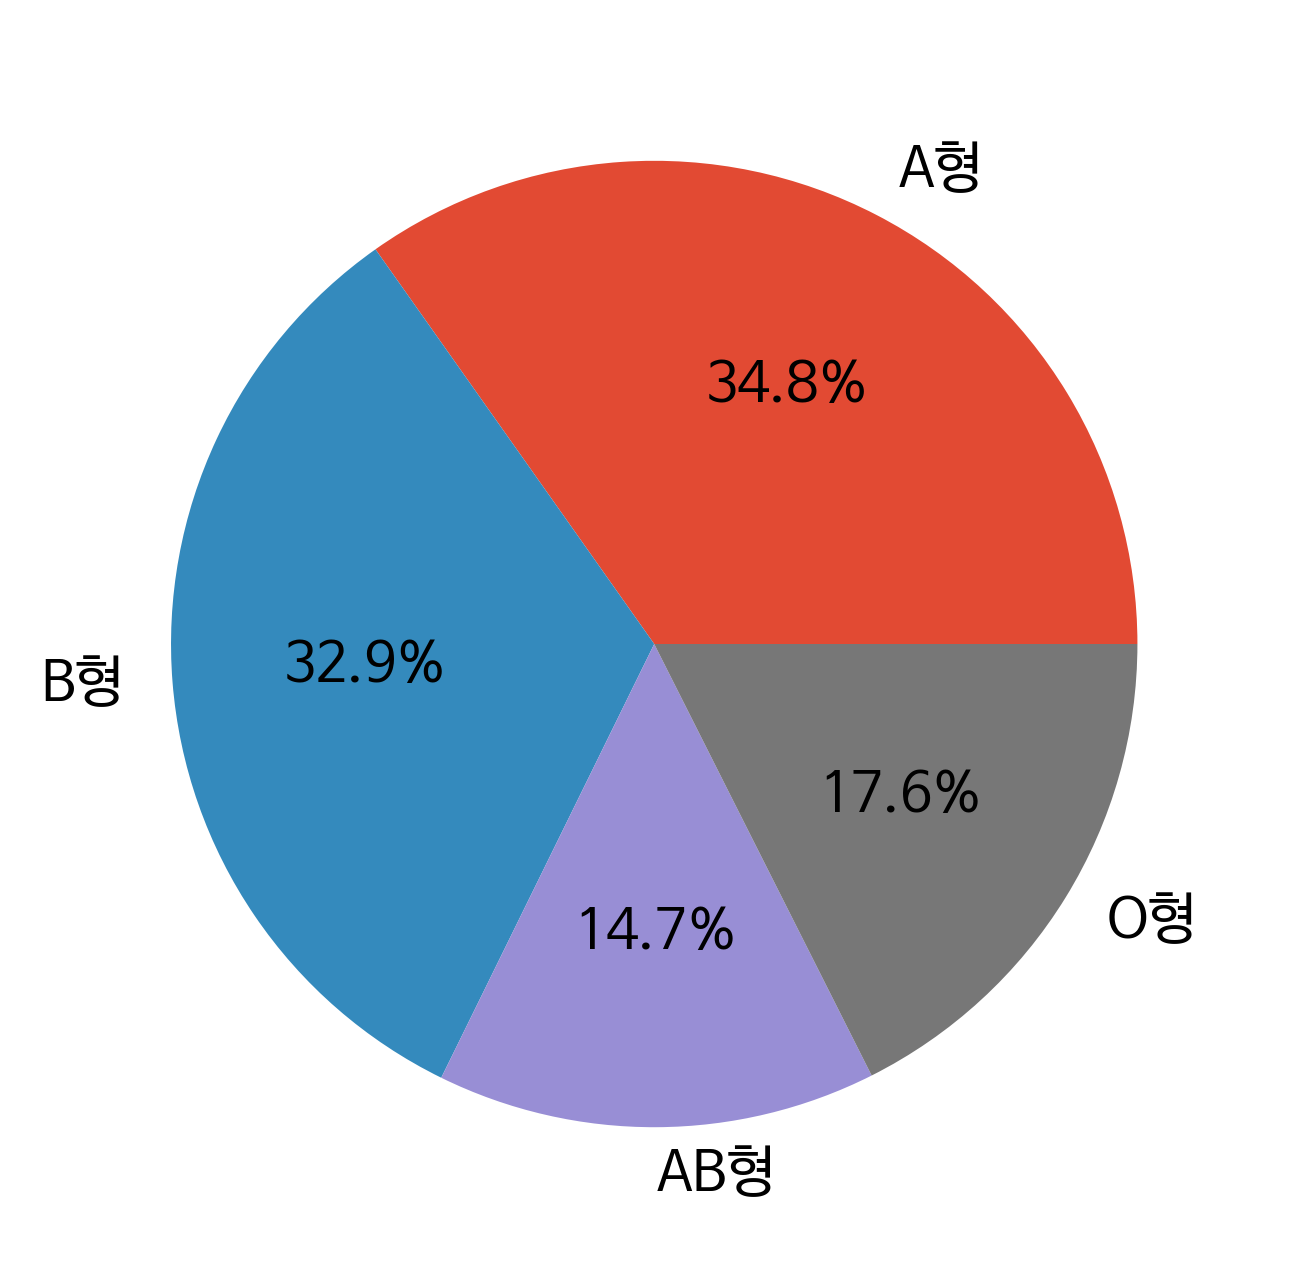

In [ ]:
import matplotlib.pyplot as plt

plt.figure(dpi=200)

size = [2441,2312,1031,1233]
label = ['A형','B형','AB형','O형']
plt.pie(size, labels=label, autopct='%.1f%%')

plt.show()

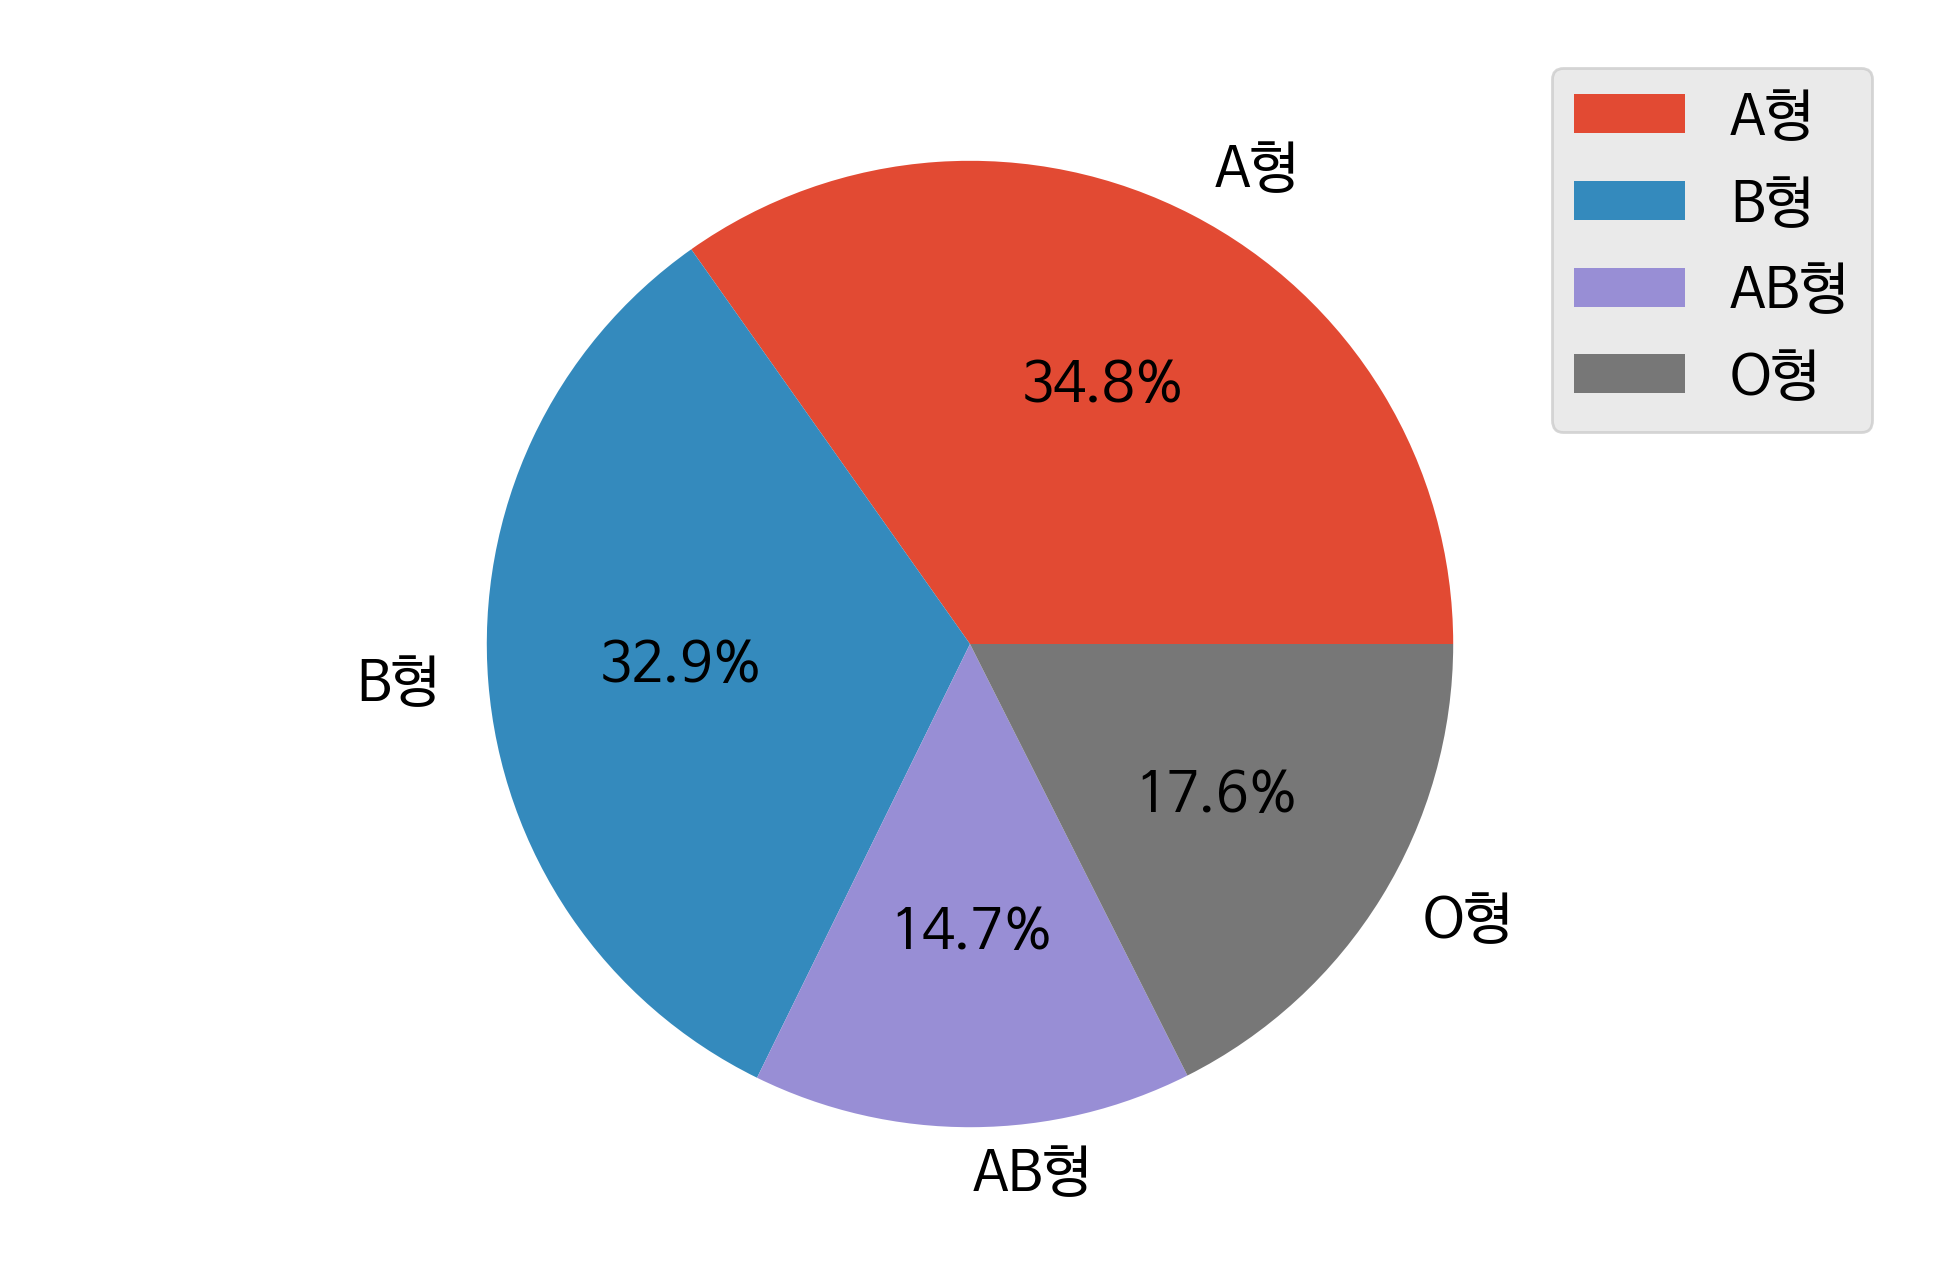

In [ ]:
import matplotlib.pyplot as plt

plt.figure(dpi=200)

size = [2441,2312,1031,1233]
label = ['A형','B형','AB형','O형']
plt.axis('equal') # 범례의 위치를 알맞게 조정
plt.pie(size, labels=label, autopct='%.1f%%') # 혈액형의 비율을 임의로 작성
plt.legend()
plt.show()

**그래프 색상표**

https://matplotlib.org/gallery/color/named_colors.html


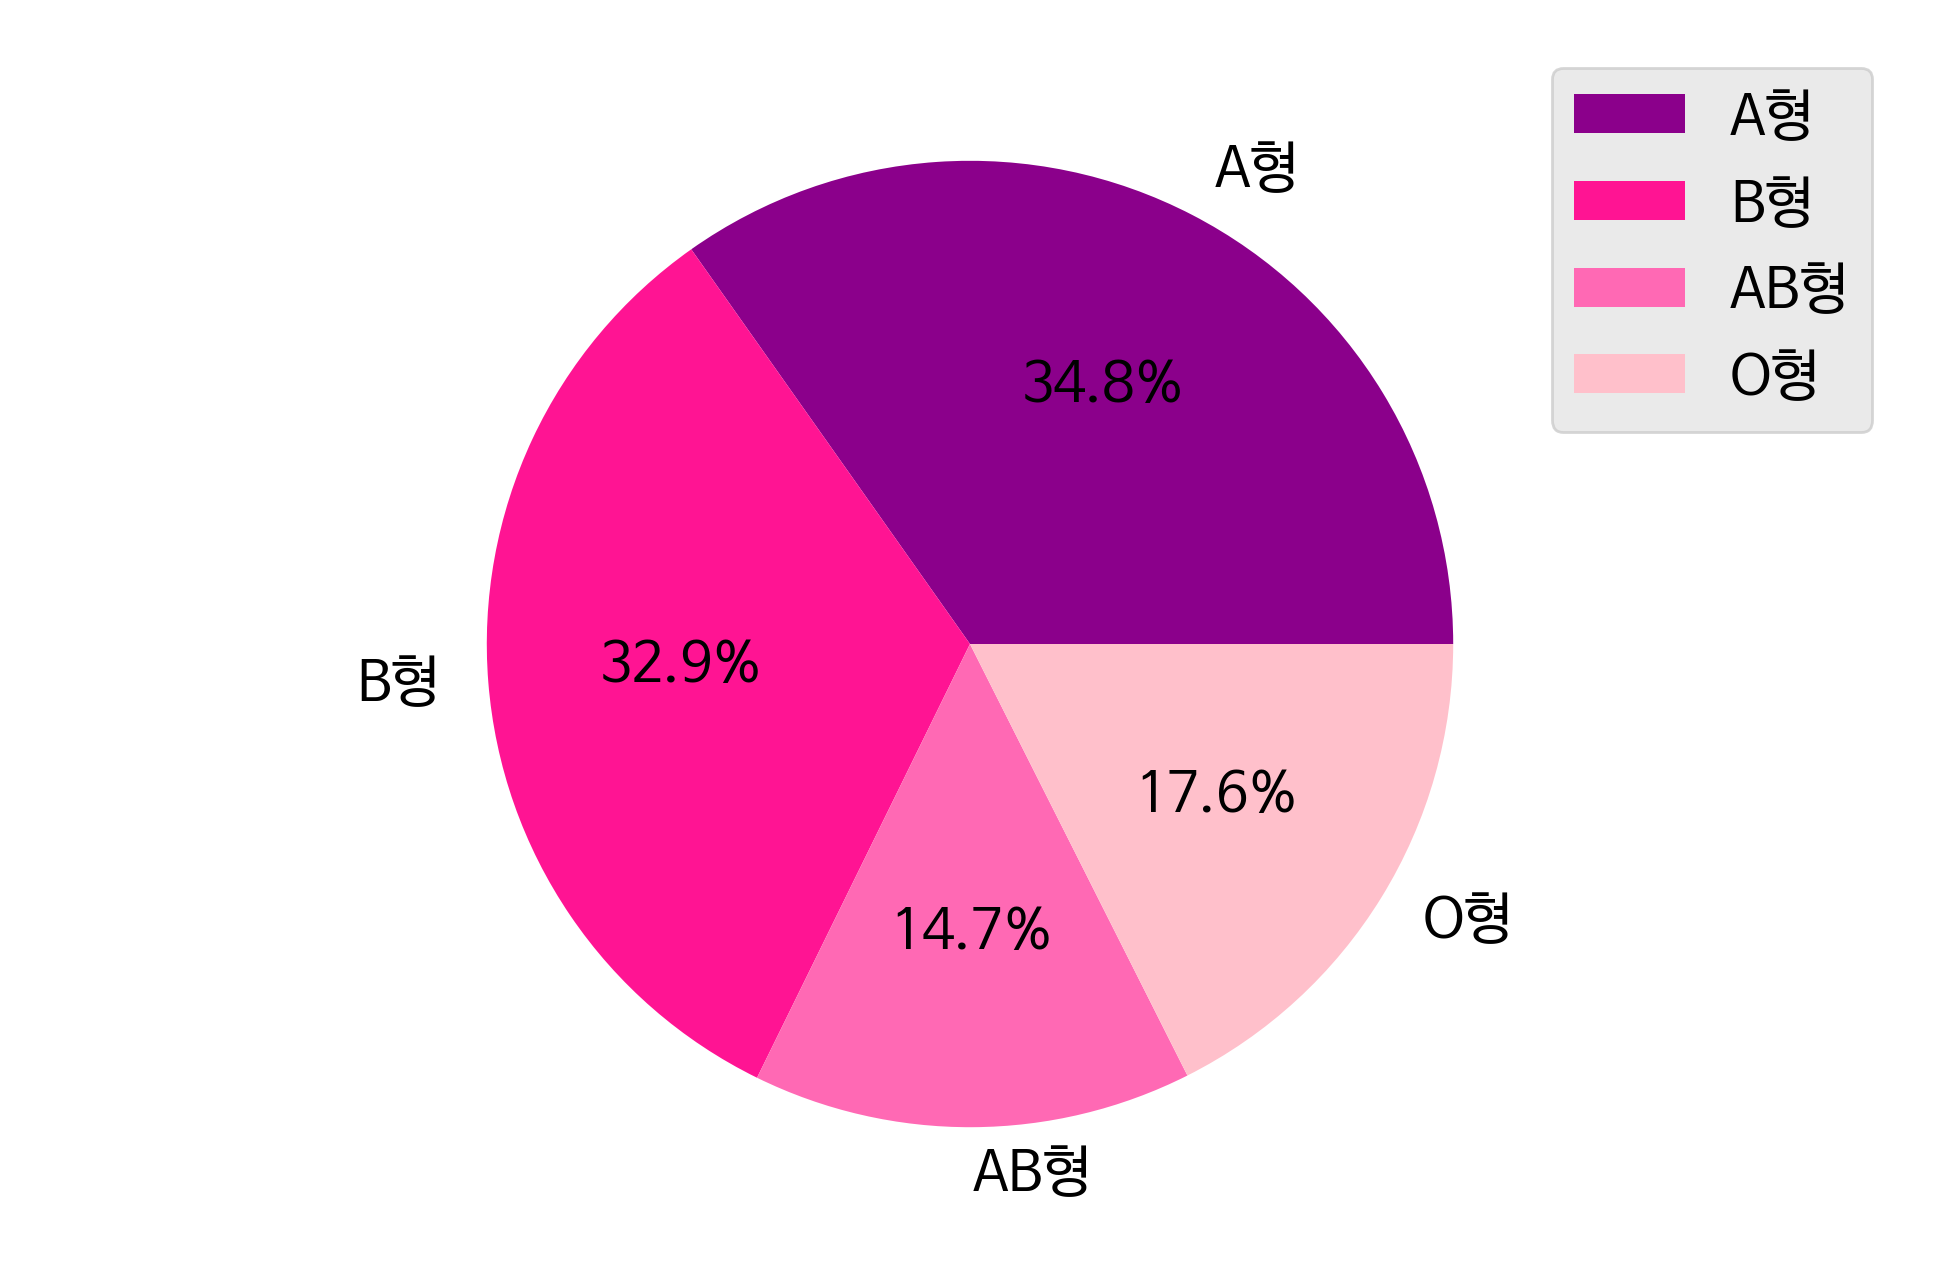

In [ ]:
import matplotlib.pyplot as plt

plt.figure(dpi=200)

size = [2441,2312,1031,1233]
label = ['A형','B형','AB형','O형']
color = ['darkmagenta', 'deeppink', 'hotpink', 'pink']
plt.axis('equal') # 범례의 위치를 알맞게 조정
plt.pie(size, colors=color, labels=label, autopct='%.1f%%') # 혈액형의 비율을 임의로 작성
plt.legend()
plt.show()

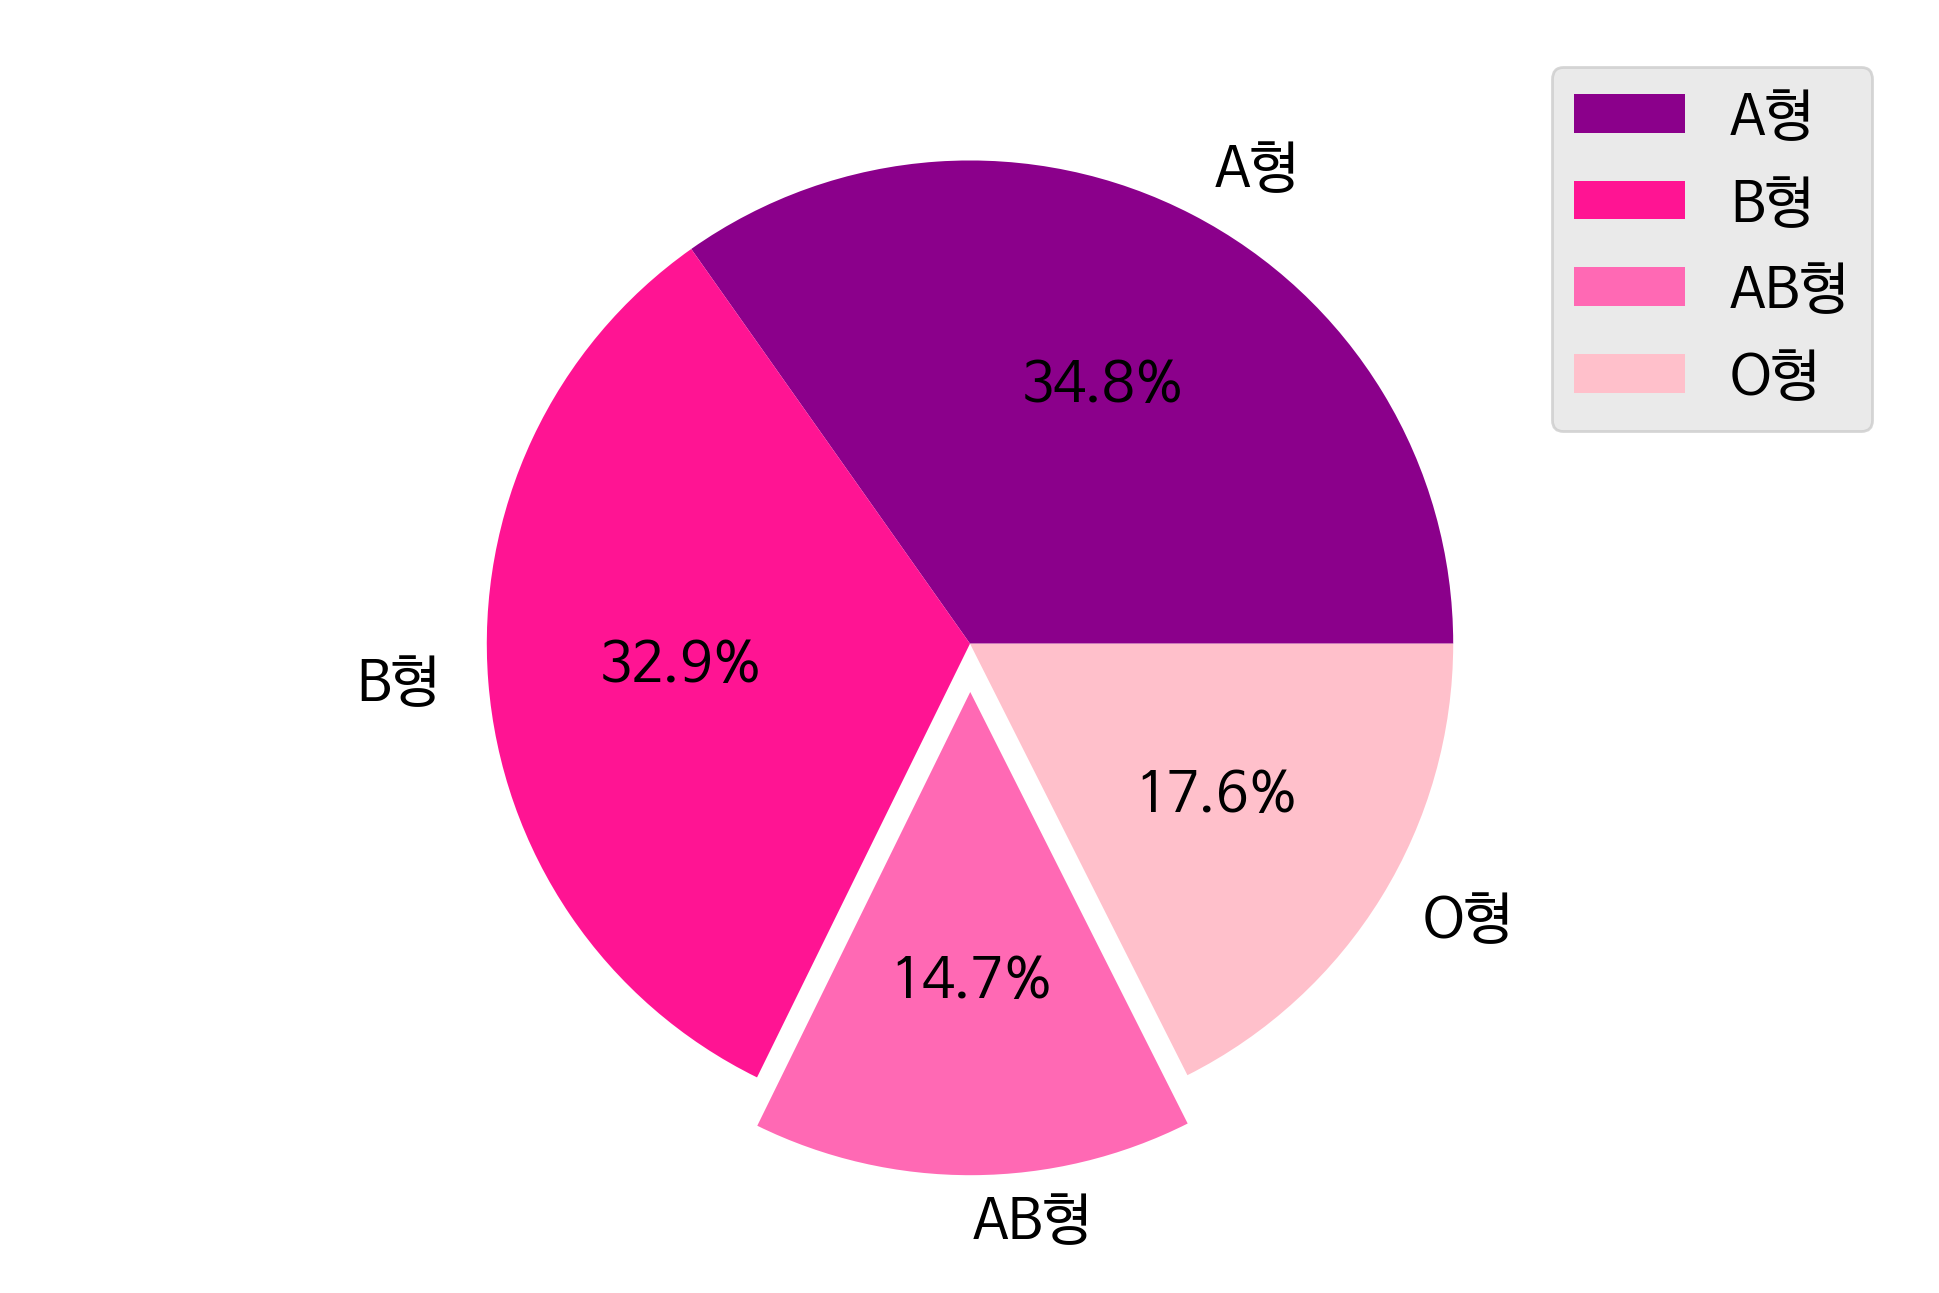

In [ ]:
import matplotlib.pyplot as plt

plt.figure(dpi=200)

size = [2441,2312,1031,1233]
label = ['A형','B형','AB형','O형']
color = ['darkmagenta', 'deeppink', 'hotpink', 'pink']
plt.axis('equal') # 범례의 위치를 알맞게 조정
plt.pie(size, colors=color, labels=label, autopct='%.1f%%',explode=(0,0,0.1,0)) # 특정 데이터를 강조하고 싶을 때
plt.legend()
plt.show()

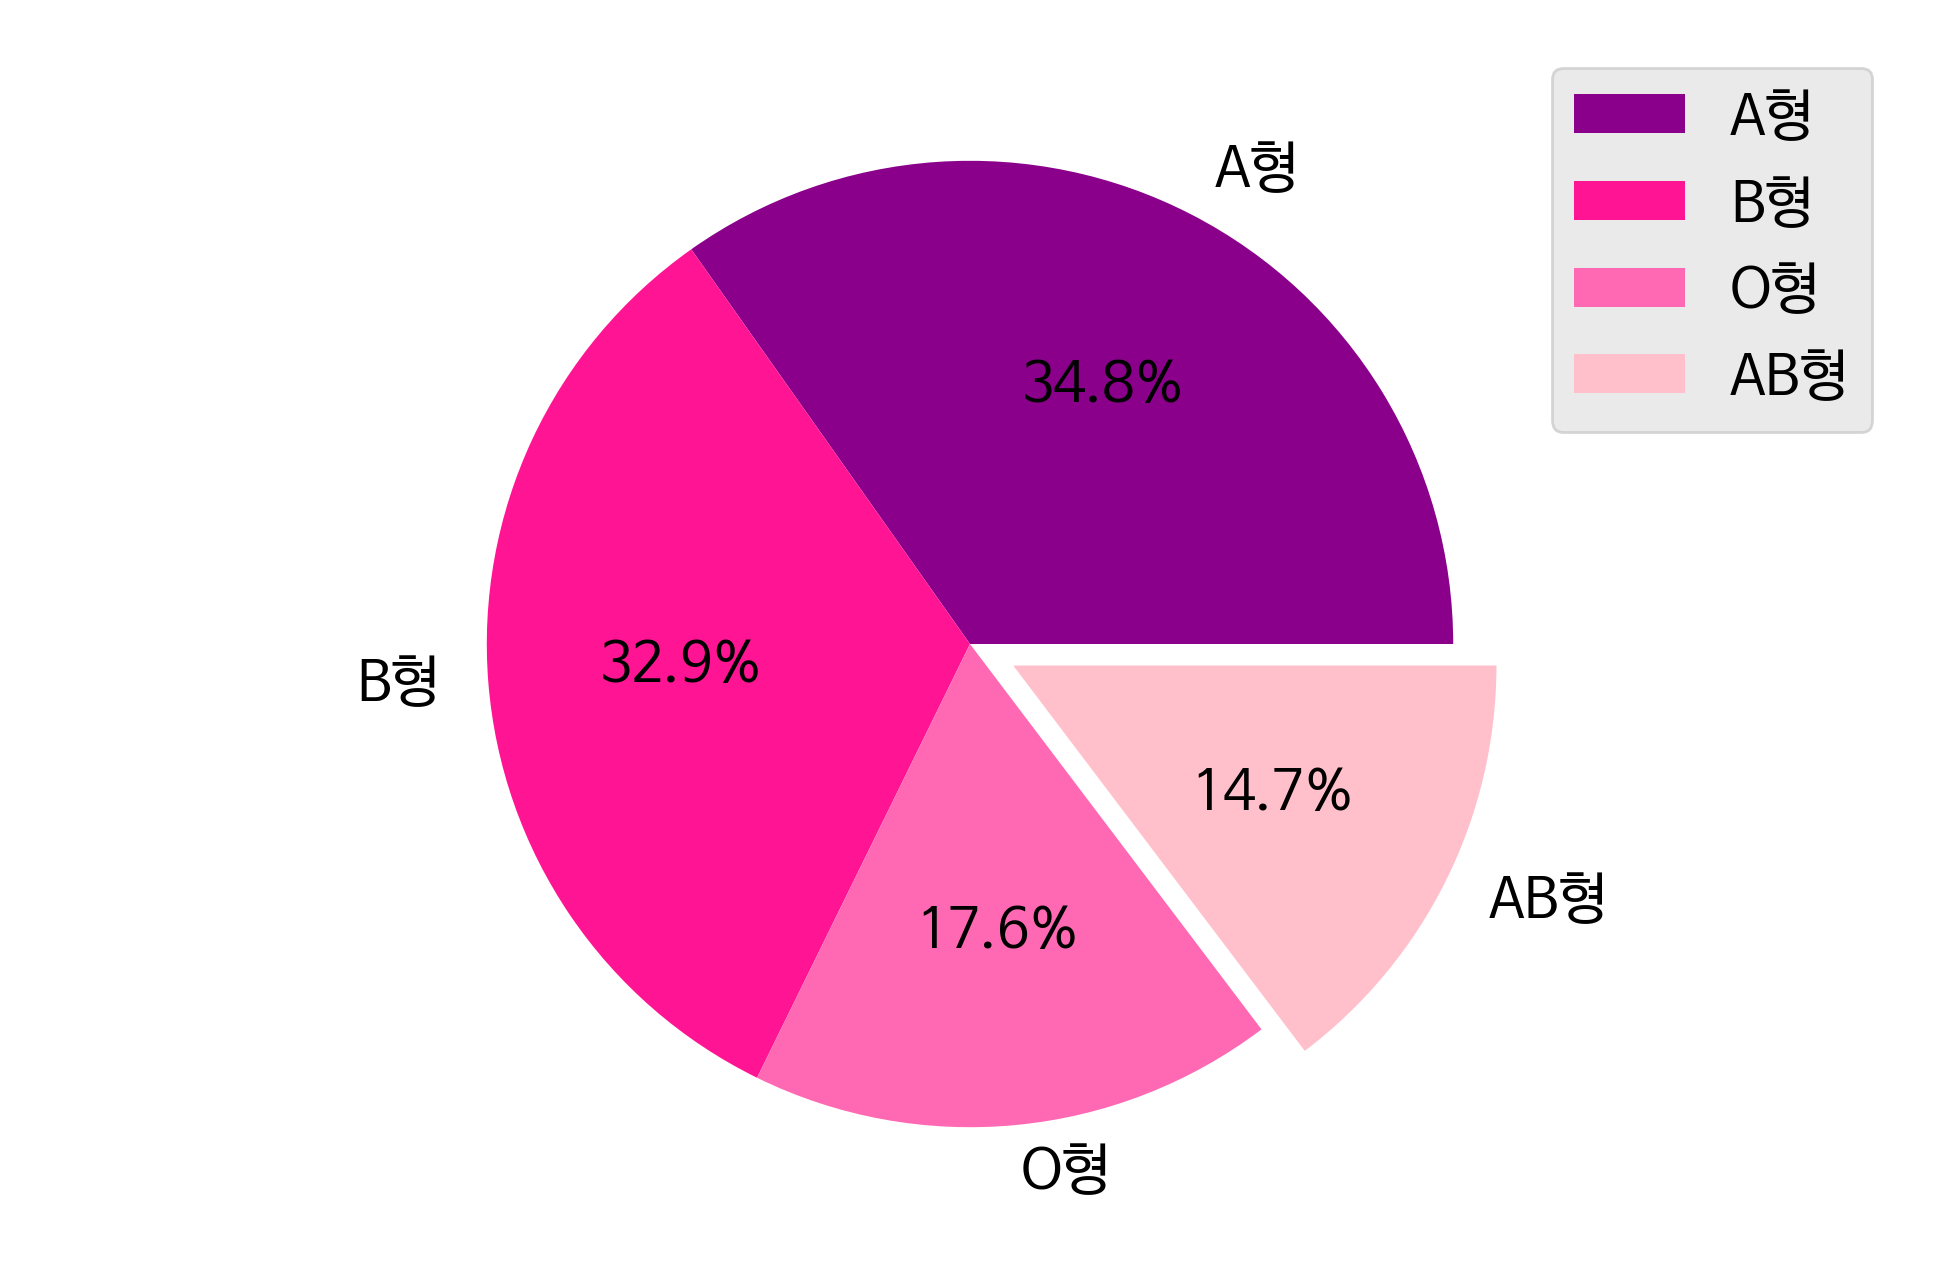

In [ ]:
import matplotlib.pyplot as plt

plt.figure(dpi=200)

size = [2441,2312,1233, 1031]
label = ['A형','B형','O형','AB형']
color = ['darkmagenta', 'deeppink', 'hotpink', 'pink']
plt.axis('equal')
plt.pie(size, colors=color, labels=label, autopct='%.1f%%',explode=(0,0,0,0.1)) # 특정 데이터를 강조하고 싶을 때
plt.legend()
plt.show()

제주도의 성별 인구 비율 표현하기

지역명을 입력하세요 : 제주특별자치도


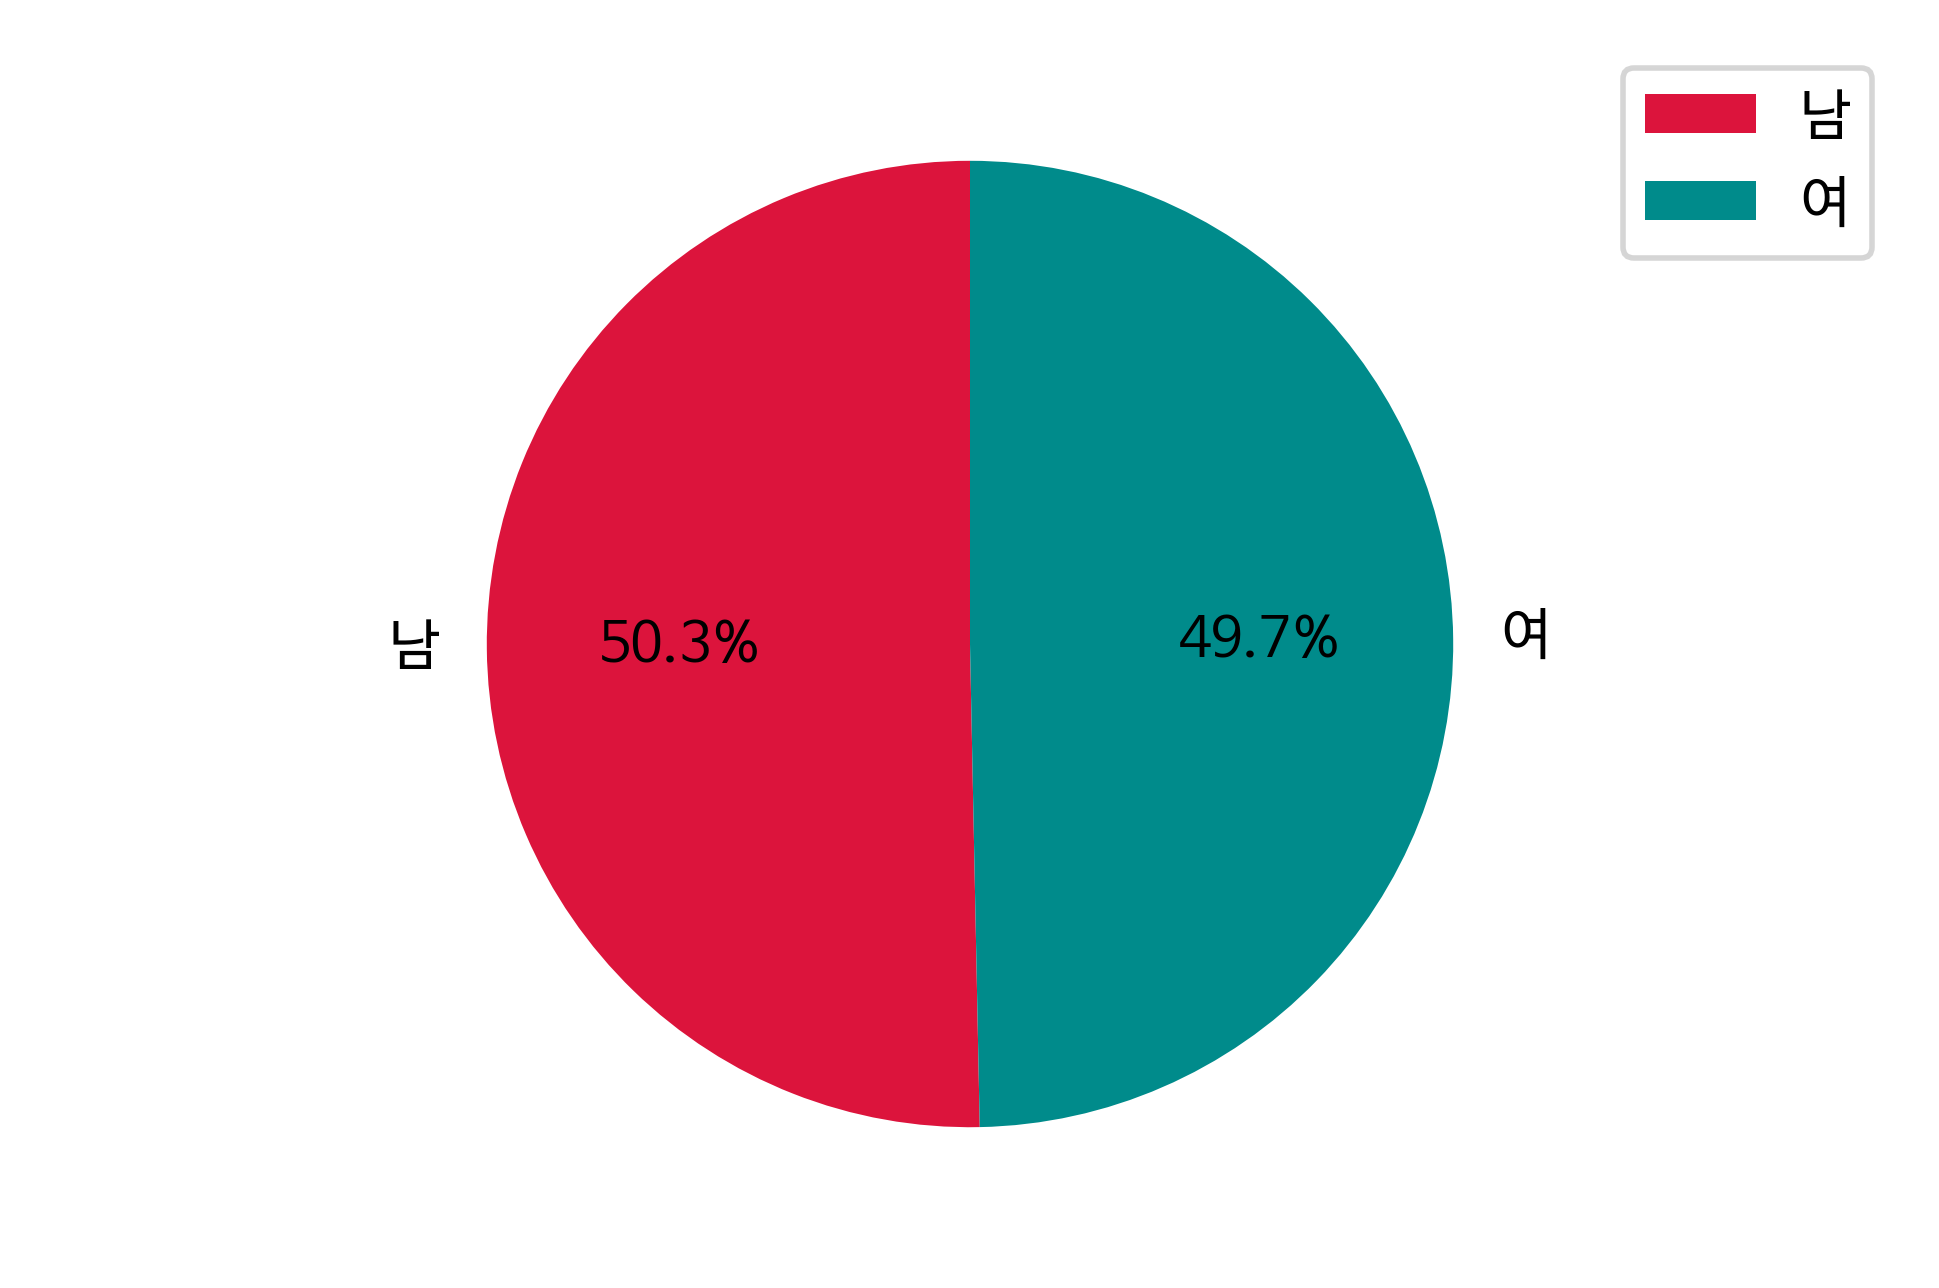

In [ ]:
import csv
import matplotlib.pyplot as plt


f=open('gender.csv',encoding='cp949')
data=csv.reader(f)

size = [] #제주도의 남성 인구 합계, 여성 인구 합계

name=input('지역명을 입력하세요 : ')
for row in data:
  if name in row[0]:
    m=0 # 남성 인구수 합계 변수
    f=0 # 여성 인구수 합계 변수

    for i in range(101):
      m += int(row[3+i].replace(',','')) # m = m + int(row[3+i].replace(',',''))
      f += int(row[106+i].replace(',','')) # f = f + int(row[3+i].replace(',',''))

    break

size.append(m)
size.append(f)

# pie 차트 시각화

plt.figure(dpi=200)
label = ['남','여']
color = ['crimson', 'darkcyan']
plt.axis('equal')
plt.pie(size, colors=color, labels=label, autopct='%.1f%%',startangle=90) # 특정 데이터를 강조하고 싶을 때
plt.legend()
plt.show()
